In [1]:
%matplotlib inline
from pjr import *

class <class 'cdms2.tvariable.TransientVariable'>
lat2.size 180
aa
lat1.size 94
bb
cc
xxx 180 94


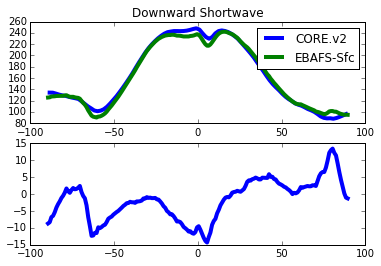

In [2]:
f = cdms2.open("/Users/d3x345/Desktop/NetCDF_files/COREV2_ncar_rad.15JUNE2009.nc");
varlist = f.listvariables();
dims = f.listdimension();
#print dims;
#print varlist;

U =  f('SWDN');
U = cdutil.averager(U, axis='x');
U = cdutil.averager(U, axis='0',weights='equal');
data1 = U[...]
lat1 = f['LAT'];
#print "lat1", lat1.shape;
#print "data ", data1.shape;

g = cdms2.open("/Users/d3x345/Desktop/NetCDF_files/CERES_EBAF-Surface_Ed2.8_Subset_200003-201409.nc");
varlist = g.listvariables();
dims = g.listdimension();
#print dims;
#print varlist;

V =  g('sfc_sw_down_all_mon');
V = cdutil.averager(V, axis='x');
V = cdutil.averager(V, axis='0',weights='equal');
data2 = V[...]
lat2 = g['lat'];

onedplot(lat1,data1,lat2,data2)

plt.show()


In [5]:
(0.2*0.2 + 1)**0.5


1.019803902718557

In [32]:
# get the data, remap the model to the EBAF resolution
g = cdms2.open("/Users/d3x345/Desktop/NetCDF_files/CERES_EBAF-Surface_Ed2.8_Subset_200003-201409.nc");
varlist = g.listvariables();
dims = g.listdimension();
#print dims;
#print varlist;

V =  g('sfc_sw_down_clr_mon')
cdutil.setTimeBoundsMonthly(V)
#print "xx", V.info()
# the next lines useful for annual averages
#V = cdutil.YEAR(V)[1:-1,...]  # throw out partial years
V = cdutil.JJA(V)
V = cdutil.averager(V, axis='0',weights='equal'); # time average
#print "YY", V.info()
print "range", V.min(), V.max()
lat = g['lat']
#print "lat info", lat.info()
lon = g['lon']
#time = g['time']
#print time;
#data.info()


fname = "/Users/d3x345/Desktop/NetCDF_files/vd05_ANN_climo.nc"
fname = "/Users/d3x345/Desktop/NetCDF_files/vd05_JJA_climo.nc"
g2 = cdms2.open(fname);
varlist = g2.listvariables();
dims = g2.listdimension();
#print dims;
#print varlist;

V2 =  g2('FSDSC',squeeze=1)            # extract fields, remove dimensions length one
LANDFRAC2 = g2('LANDFRAC',squeeze=1)
print "V2 range", V2.min(), V2.max()
lat2 = g2['lat']
lon2 = g2['lon']

# create a remapped copy of V2 and LANDFRAC
if V2.size < V.size :
    outgrid = V.getGrid()
    rt = 'esmf'
    rm = 'conservative'
    V2a = V2.regrid(outgrid, regridTool=rt, regridMethod=rm)
    LF2a = LANDFRAC2.regrid(outgrid, regridTool=rt, regridMethod=rm)
    print "remapping to shape", V2a.shape
    print "LF2a range", LF2a.min(), LF2a.max()
    print "V2a range", V2a.min(), V2a.max()

# if V2av and V2a_av differ it suggests that the averager is using a different weighting value
print "V2av=", cdutil.averager(V2,axis="xy",weights="weighted")
print "V2a_av=", cdutil.averager(V2a,axis="xy",weights="weighted")
print "LANDFRAC2av=", cdutil.averager(LANDFRAC2,axis="xy",weights="weighted")
print "LANDFRAC2a_av=", cdutil.averager(LF2a,axis="xy",weights="weighted")

DV = V2a - V
print "DV_av=", cdutil.averager(DV,axis="xy",weights="weighted")
print "DV.shape", DV.shape
print "LANDFRAC2.shape", LANDFRAC2.shape
print "LF2a.shape", LF2a.shape

#DDV = DV - DVF

range 0.0 387.535441191
V2 range 0.0 386.586
remapping to shape (180, 360)
LF2a range 0.0 1.0
V2a range 0.0 385.463
V2av= 233.186541132
V2a_av= 233.187081605
LANDFRAC2av= 0.291745926917
LANDFRAC2a_av= 0.291745137508
DV_av= 0.127690300714
DV.shape (180, 360)
LANDFRAC2.shape (192, 288)
LF2a.shape (180, 360)


LF2a_av= 0.291745137508


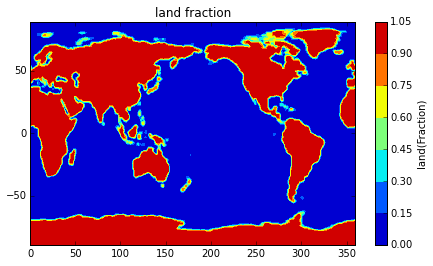

In [4]:
plt.figure(figsize=(16, 4))
#fig, ax = plt.subplots()
plt.subplot(121)
plt.title("land fraction")
cs = plt.contourf(lon, lat, LF2a)
# add colorbar.
cbar = plt.colorbar(cs)
cbar.set_label('land(Fraction)')
print "LF2a_av=", cdutil.averager(LF2a,axis="xy",weights="weighted")
plt.show()

llist False True
longname Clearsky downwelling solar flux at surface
DVM = 3.70
[-60.0, -50.0, -40.0, -30.0, -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0]


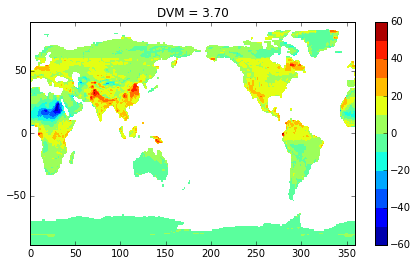

In [5]:
#LANDFRAC.info()
#print "LANDFRAC2 =", cdutil.averager(LANDFRAC2,axis="xy",weights="weighted")
#print "masked LANDFRAC2 =", cdutil.averager(LFM,axis="xy",weights="weighted")
#print "dir(LF)", dir(LANDFRAC)
#print "xx", LANDFRAC2.info()
llist = (LF2a[:] < 0.5)
print "llist",llist[0,0],llist[-1,-1] # print out a few values which should be near NP and SP
#print "land zero", llist.shape
LFM = LF2a[:]
DVM = DV
DVM.mask = llist # add a mask for land points
print "longname",DVM.long_name
plt.figure(figsize=(16, 4))
#fig, ax = plt.subplots()
plt.subplot(121)
gavg = cdutil.averager(DVM,axis="xy",weights="weighted")
#titl = "{0:s} (model-obs) = {1:f}".format("DVM",gavg)
titl = "%s = %.2f"%("DVM", gavg)
print titl
plt.title(titl)
clevs =  np.arange(-60.,70., 10).tolist()
print clevs
cs = plt.contourf(lon, lat, DVM, clevs)
# add colorbar.
cbar = plt.colorbar(cs)
plt.show()
#print "masked DV =", cdutil.averager(DVM,axis="xy",weights="weighted")



clevs [100.0, 110.0, 120.0, 130.0, 140.0, 150.0, 160.0, 170.0, 180.0, 190.0, 200.0, 210.0, 220.0, 230.0, 240.0, 250.0, 260.0, 270.0, 280.0, 290.0, 300.0, 310.0, 320.0, 330.0]


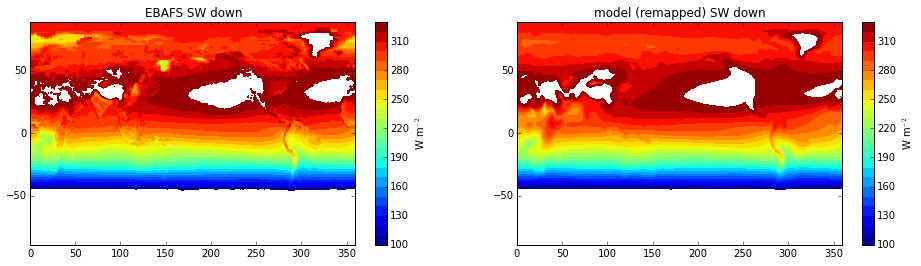

In [6]:
clevs =  np.arange(100.,340., 10).tolist()
print "clevs", clevs
plt.figure(figsize=(16, 4))
#fig, ax = plt.subplots()
plt.subplot(121)
plt.title("EBAFS SW down")
cs = plt.contourf(lon, lat, V, clevs)
cmap = plt.cm.get_cmap("nipy_spectral")
colors = cmap(np.linspace(0,1,len(clevs)))
# add colorbar.
cbar = plt.colorbar(cs)
cbar.set_label('W m$^{-2}$')
plt.subplot(122)
plt.title("model (remapped) SW down")
cs = plt.contourf(lon, lat, V2a, clevs)
cmap = plt.cm.get_cmap("nipy_spectral")
colors = cmap(np.linspace(0,1,len(clevs)))
# add colorbar.
cbar = plt.colorbar(cs)
cbar.set_label('W m$^{-2}$')

plt.show()




(180, 360)


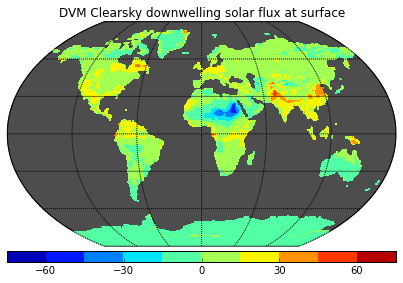

In [41]:
# example from http://matplotlib.org/basemap/users/examples.html

date = datetime(2007,12,15,0) # date to plot.
# open dataset.
#dataset = \
#Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
#timevar = dataset.variables['time']
#timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
#sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
#ice = dataset.variables['ice'][timeindex,:].squeeze()

lons, lats = np.meshgrid(lon,lat)
print lons.shape
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)
m = Basemap(projection='kav7',lon_0=0,resolution=None)
# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
m.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
# im1 = m.pcolormesh(lons,lats,DVM,shading='flat',cmap=plt.cm.jet,latlon=True)
# cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# draw parallels and meridians, but don't bother labelling them.
# contour data over the map.
cs = m.contourf(lons,lats,DVM,10,latlon=True)
plt.title('contour lines over filled continent background')
m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))
# add colorbar
cb = m.colorbar(cs,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('DVM %s'% DVM.long_name)
plt.show()
